<a href="https://colab.research.google.com/github/praneethalla/2203A52069/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/Wine.csv')

feat = data[['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline',]]
target = data['Customer_Segment']

x_train,x_test,y_train,y_test = train_test_split(feat,target,test_size=0.3)

#svc
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#predict
y_pred = svc.predict(x_test)

#before pca
before_pca = accuracy_score(y_test,y_pred)
print(f'before pca : {before_pca:.2f}')


#standard scaled
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(feat)

num_components = 4
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_feat)


#
x_train,x_test,y_train,y_test = train_test_split(scaled_feat,target,test_size=0.5)

svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#predict
y_pred = svc.predict(x_test)

#before pca
after_pca = accuracy_score(y_test,y_pred)
print(f'after pca : {after_pca:.2f}')











before pca : 0.94
after pca : 0.98


Logistic Regression Accuracy: 0.7142857142857143
SVM Accuracy: 0.7142857142857143


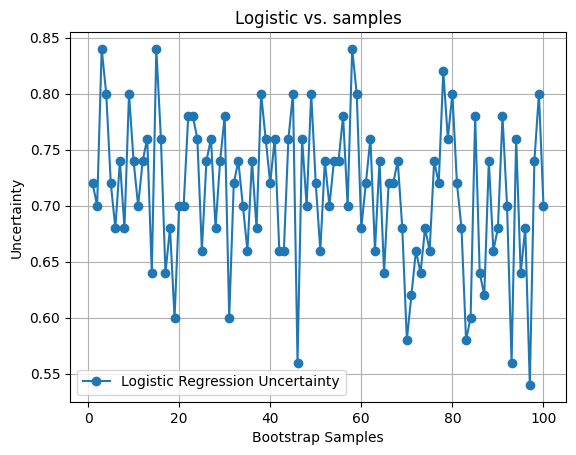

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('/content/breast_cancer_survival.csv')



drop_columns = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
data = data.drop(columns=drop_columns)



data['modified_Tumour_Stage'] = data['Tumour_Stage'].map({'I': 1, 'II': 2}).fillna(3)
data['mod_Patient_Status'] = (data['Patient_Status'] == 'Alive').astype(int)
data['modified_HER2_status'] = (data['HER2 status'] == 'Positive').astype(int)



X = data.drop(['Tumour_Stage', 'Patient_Status', 'mod_Patient_Status', 'HER2 status'], axis=1)
y = data['mod_Patient_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)



logistic_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)



accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))



print("Logistic Regression Accuracy:", accuracy_logistic)
print("SVM Accuracy:", accuracy_svm)


n_bootstraps = 100
sample_sizes = range(1, 51)


logistic_uncertainty = []
svm_uncertainty = []

for size in sample_sizes:
    logistic_bootstrap_uncertainty = []
    svm_bootstrap_uncertainty = []
    for _ in range(n_bootstraps):

        bootstrap_indices = np.random.choice(len(y_test), size, replace=True)
        X_bootstrap = X_test.iloc[bootstrap_indices]
        y_bootstrap = y_test.iloc[bootstrap_indices]


        logistic_pred = logistic_model.predict(X_bootstrap)
        svm_pred = svm_model.predict(X_bootstrap)


        logistic_accuracy = accuracy_score(y_bootstrap, logistic_pred)
        svm_accuracy = accuracy_score(y_bootstrap, svm_pred)

        logistic_bootstrap_uncertainty.append(logistic_accuracy)
        svm_bootstrap_uncertainty.append(svm_accuracy)

sample_indices = range(1, n_bootstraps + 1)


plt.plot(sample_indices, logistic_bootstrap_uncertainty, label='Logistic Regression Uncertainty', marker='o')

plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('Logistic vs. samples')
plt.legend()
plt.grid(True)

plt.show()